 # Python ML for Docs: Session 1
 ## Library import
 
 First, we must load the necessary libraries. 
 
 It's also good to know a few shortcuts.  CTRL+Enter will run the cell that you are in.  
    


In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Create variables

Shortcut to know: if your cursor is inside the opening "(" of a function, click SHIFT+B to get the signature of the function which will tell you about the parameters and parameter names that it requires.

In [8]:
x = np.random.randint(0,25,100)
m = 3
b = 15
y = [m * np.random.normal(loc=xx, scale=10, size=1) + b for xx in x]

Above, **x** is a random vector with 100 values between 0 and 25.  
**m** is the slope
**b** is the intercept
**y** is another random vector of length 100, each value has a mean equal to the value of **mx + b** at that position with a random Gaussian noise added with **scale** or **standard deviation** equal to 10.

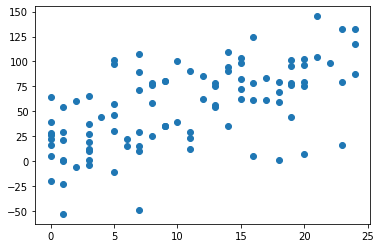

In [9]:
plt.scatter(x,y)

## Recognize Digits

Now we take these basic skills and attempt to build a hand-written digit recognizer.  We will utilize the resnet model.  You can learn more about the resnet neural network and it's performance and history [here](https://en.wikipedia.org/wiki/Residual_neural_network).


In [10]:
pd.read_csv("./digit-recognizer/train.csv").head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above, you see that each row of our dataset has a label (0-9) and then 784 columns (pixel0-pixel783).  We happen to know that this famous **MNIST** dataset is *28x28* pixel images ... 784.  So we just reshape and display the images.

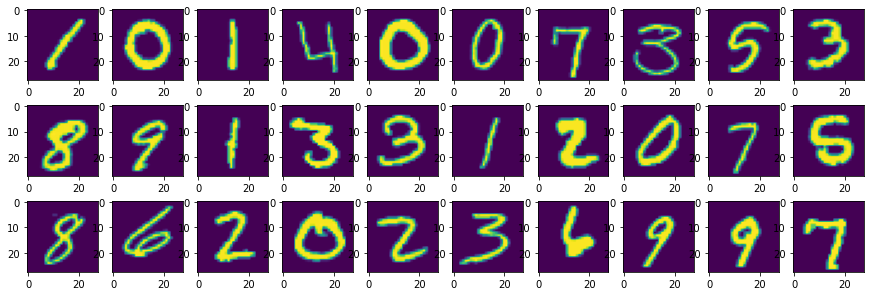

1 0 1 4 0 0 7 3 5 3
8 9 1 3 3 1 2 0 7 5
8 6 2 0 2 3 6 9 9 7


In [85]:
train = pd.read_csv("./digit-recognizer/train.csv")

y = train["label"]
y = y.values
x = train.drop(labels=["label"],axis=1)
x /= 255.0
x = x.values.reshape(-1,28,28)

plt.figure(figsize=(15,5))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.imshow(x[i])
plt.show()

for i in range(3):
    print(*y[10*i:10*i+10])


### Learn Pytorch

Pytorch is one of many machine-learning libraries that you have access to within a python environment.  The building block of pytorch is a *tensor*.  You could consider a vector to be a *1d* tensor, a matrix to be a *2d* tensor, an image (with 3 channels) to be a *3d* tensor.  We can continue to extend to *Nd* tensors.

Tensors can be multiplied just like matrices can be multiplied.  In fact, each *layer* of a neural network is just a tensor.  It takes an input, which is a tensor, and produces an output, which is another tensor.  The next layer of the network takes the current layer's output as an input.  

In this way, you can envision an input tensor traveling through each layer of the network and being transformed by each layer.  The *weights* of each layer's transformation tensor determine how the input becomes the output.

If you start with a network with a random set of weights at each layer, you would expect random output.  However, you can calculate the distance from your output to a target (or set of targets).  You also know which direction you have to move each of your weights to get the input closer to the output.  Assuming the input is pretty representative of your samples, with each round of training you move your weights in this smart way so that the output more closely matches the target.  Before you know it, after many rounds of training, your *predictions* are getting close to *ground truth*.


In [40]:
import torch

ds = torch.utils.data.TensorDataset(torch.from_numpy(x), torch.from_numpy(y))
dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle = True)

Above, we imported the *torch* library and just wrapped our data in *TensorDataset* and *DataLoader* classes.  I won't go into the details but this takes advantage of the underlying machines ability to compute in parallel if it has access to multiple CPUs or even a single GPU (which has multiple sub-processing units and can therefore compute in parallel very efficiently).


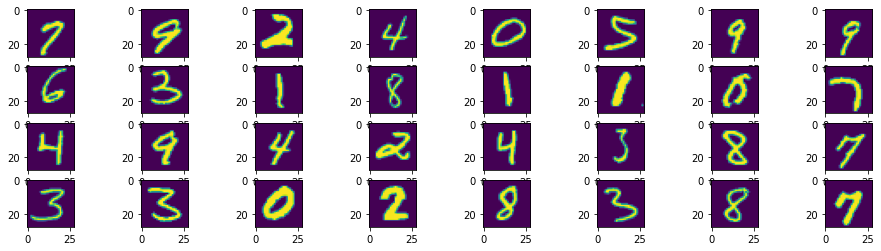

7 9 2 4 0 5 9 9
6 3 1 8 1 1 0 7
4 9 4 2 4 3 8 7
3 3 0 2 8 3 8 7


In [61]:
x, y = next(iter(dl))
x = x.reshape(-1,1,28,28)

plt.figure(figsize=(16,4))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(x[i][0])
plt.show() 

for i in range(4):
    print(*y[i*8:i*8+8].numpy())

We are getting 32 samples in each batch from the iteration of our *DataLoader* class instance.

Next, we will import a pretrained *resnet* model, a relatively simple one, from the *torchvision* library.  It has been trained on an *ImageNet* dataset consisting of dogs, cats, humans, and many other objects, but it has learned to pick out key features in images and can be retrained to map these features to hand-written digits.


In [79]:
import torchvision

model = torchvision.models.resnet18(pretrained=True)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Wow, that model is really complicated and we will go into what each layer does in the future.  However, know that a *Conv2d* layer takes a window of shape **kernel_size**, which might be a *3x3* window, and moves that window from the top left of your image to the right, then down (like a typewriter) until it reaches the bottom right. So the output takes as it's input each *3x3* window of the input image and maps it to an output of some shape ... but does this multiple times as the window slides across the input image.

*BatchNorm* does normalization ... subtracting the mean pixel intensity and dividing by the standard deviation.

*ReLU* takes the positive portion of the output only; it is similar to absolute value but differentiable throughout.

We replace the input layer to take an image with a single channel (i.e. a grayscale image) and we replace the output layer to output a *tensor* with 10 values (because we are trying to map to 10 digits).

In [81]:
model.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(7,7), stride=(2,2), padding=(3,3), bias=True)
model.fc = torch.nn.Linear(in_features=512, out_features=10, bias=True)

At this point, it's fun to look and see if our model is any good.  Of course it's not, because it's been trained on dog & cat images and not on digits.  We will change that with a few rounds of training.

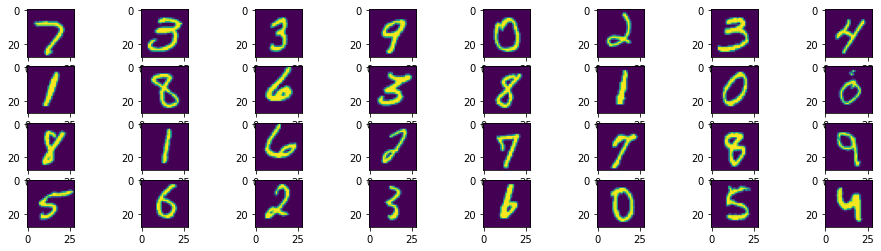

6 6 6 2 8 3 9 6
8 6 1 6 9 8 5 8
2 8 6 6 6 8 6 8
6 7 1 6 6 6 6 6


In [82]:
x, y = next(iter(dl))

x = x.reshape(-1,1,28,28).type(torch.float32)
y_hat = torch.argmax(model(x), -1)

plt.figure(figsize=(16,4))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(x[i][0])
plt.show() 

for i in range(4):
    print(*y_hat[i*8:i*8+8].numpy())

Now we train!

The *Adam* optimizer stands for *Adaptive Momentum*, basically with each round of training it updates parameter weights using not only the current **gradient** but using the recent past **gradients** ... that's the momentum part.  The adaptive part means that it keeps track of separate **momentums** for each parameter (there are like millions of them).  
You should see the loss going down with each batch!  This could take some time, there are about 1300 batches in each epoch and I'd like you to run it twice.  

**Coffee Break**

In [ ]:
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(2):
    print(f"Epoch {epoch}\n---------------")
    for batch, (x,y) in enumerate(dl):
        x = x.reshape(-1,1,28,28).type(torch.float32)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = torch.nn.CrossEntropyLoss()(y_hat,y)
        loss.backward()
        optimizer.step()
        current_loss = loss.item()
        print(f"batch {batch}/{len(dl)}, loss: {current_loss:.4f}")
        
    

## Evaluation

How did we do?  Let's scroll through all the batches and see how many correct we had, out of 32.

In [69]:
model.eval()
true, denom = 0,0
for i, (x,y) in enumerate(dl):
    x = x.reshape(-1,1,28,28).type(torch.float32)
    y_hat = torch.argmax(model(x), -1)
    true += (y_hat == y).sum()
    denom += len(y)
    print(f"correct: {(y_hat==y).sum()}/{len(y)}")

correct: 30/32
correct: 30/32
correct: 28/32
correct: 26/32
correct: 26/32
correct: 28/32
correct: 32/32
correct: 29/32
correct: 29/32
correct: 29/32
correct: 29/32
correct: 30/32
correct: 28/32
correct: 27/32
correct: 28/32
correct: 31/32
correct: 30/32
correct: 28/32
correct: 31/32
correct: 26/32
correct: 29/32
correct: 27/32
correct: 32/32
correct: 25/32
correct: 30/32
correct: 28/32
correct: 30/32
correct: 31/32
correct: 27/32
correct: 28/32
correct: 25/32
correct: 30/32
correct: 29/32
correct: 28/32
correct: 29/32
correct: 29/32
correct: 23/32
correct: 27/32
correct: 31/32
correct: 30/32
correct: 28/32
correct: 29/32
correct: 29/32
correct: 28/32
correct: 25/32
correct: 30/32
correct: 27/32
correct: 27/32
correct: 28/32
correct: 29/32
correct: 29/32
correct: 29/32
correct: 26/32
correct: 32/32
correct: 28/32
correct: 29/32
correct: 27/32
correct: 27/32
correct: 29/32
correct: 30/32
correct: 29/32
correct: 29/32
correct: 27/32
correct: 28/32
correct: 29/32
correct: 27/32
correct: 3

KeyboardInterrupt: 

Finally, let's visualize one batch and how we did.  Running this a few times can help you spot common errors, such as mistaking a 6 for a 0 or an 8 for a 0?

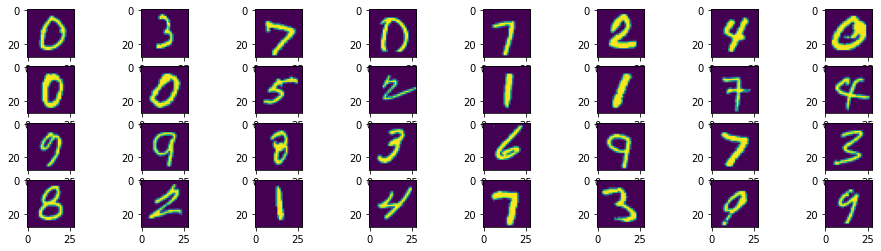

0 3 7 0 7 6 4 0
0 0 5 4 1 1 7 4
9 9 8 3 4 9 7 8
8 8 1 4 7 3 9 9


In [78]:
x, y = next(iter(dl))

x = x.reshape(-1,1,28,28).type(torch.float32)
y_hat = torch.argmax(model(x), -1)

plt.figure(figsize=(16,4))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(x[i][0])
plt.show() 

for i in range(4):
    print(*y_hat[i*8:i*8+8].numpy())